In [1]:
# # Installing Necessary libraries
# !pip install seaborn
# !pip install dask-ml
# !pip install dask-lightgbm
# !pip install statsmodels
# !pip install dask-xgboost

# **Importing necessary libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
import lightgbm as lgb
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import validation_curve
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV as rscv
from dask_ml.xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

/home/patil.ron/.local/lib/python3.8/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(


## **Displaying data :**

In [3]:
train_data = pd.read_csv('fraudTrain.csv')                                       #saving train data in the dataframe
test_data = pd.read_csv('fraudTest.csv')                                         #saving test data in the dataframe

In [4]:
train_data.head(5)                                                               #reading first 5 records in the train data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
test_data.head(5)                                                                       #reading first 5 records in the test data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## **Understanding the data using Exploratory Data Analysis-**

* **Displaying the dimnensions of the train and test dataframes -** 

In [6]:
print("Train data dimensions are: {} {}".format(train_data.shape[0], train_data.shape[1]))
print("Test data dimensions are: {} {}".format(test_data.shape[0], test_data.shape[1]))
print("Total dataset records: {}".format(train_data.shape[0] + test_data.shape[0]))

Train data dimensions are: 1296675 23
Test data dimensions are: 555719 23
Total dataset records: 1852394


* **Checking for null values:** 

In [7]:
train_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
test_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

* **Displaying the columns present in the dataframe**

In [9]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
dataset = pd.concat([train_data,test_data], ignore_index=True)

dataset.shape

(1852394, 23)

#### **Renaming the first column to ID, since it didn't have any meaningful name**

In [12]:
# Renaming the first column to ID, since it didn't have any meaningful name
dataset.rename(columns = {'Unnamed: 0':'Id', "trans_date_trans_time":"transaction_time","cc_num":"credit_card_number","amt":"amount(usd)","trans_num":"transaction_id"}, inplace = True)

In [13]:
dataset.columns

Index(['Id', 'transaction_time', 'credit_card_number', 'merchant', 'category',
       'amount(usd)', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'transaction_id',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

* **Understanding the metadata of the dataframe -** 

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   transaction_time    object 
 2   credit_card_number  int64  
 3   merchant            object 
 4   category            object 
 5   amount(usd)         float64
 6   first               object 
 7   last                object 
 8   gender              object 
 9   street              object 
 10  city                object 
 11  state               object 
 12  zip                 int64  
 13  lat                 float64
 14  long                float64
 15  city_pop            int64  
 16  job                 object 
 17  dob                 object 
 18  transaction_id      object 
 19  unix_time           int64  
 20  merch_lat           float64
 21  merch_long          float64
 22  is_fraud            int64  
dtypes: float64(5), int64(6), object(12)
memory usage: 325.1+ 

In [15]:
dataset.describe()

,Id,credit_card_number,amount(usd),zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## **Data Preprocessing:**

### **1. On Training Data**

#### **Since columns -'category' and 'gender' are categorical in nature, we need to encode the data in the numerical form. This can be achieved by Label Encoder.**

In [16]:
#Unique values in category - 
print(dataset['category'].unique())

['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']


In [17]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'categories'.
dataset['category']= label_encoder.fit_transform(dataset['category'])
  
dataset['category'].unique()

array([ 8,  4,  0,  2,  9,  3, 11, 12,  1, 10,  5, 13,  7,  6])

In [18]:
#Unique values in gender - 
print(train_data['gender'].unique())

['F' 'M']


In [19]:
# Encode labels in column 'gender'.
dataset['gender']= label_encoder.fit_transform(dataset['gender'])
  
dataset['gender'].unique()

array([0, 1])

#### **Feature Engineering**

In [20]:
# Feature Engineering - Calculating age column from the Date of birth of the credit card customer
dataset['age']=dt.date.today().year-pd.to_datetime(dataset['dob']).dt.year

In [21]:
# Feature Engineering - Calculating hour, day, month and year columns from the 'transaction_time' of the transactions done by credit card customer
dataset['hour']=pd.to_datetime(dataset['transaction_time']).dt.hour
dataset['day']=pd.to_datetime(dataset['transaction_time']).dt.dayofweek
dataset['month']=pd.to_datetime(dataset['transaction_time']).dt.month
dataset['year']=pd.to_datetime(dataset['transaction_time']).dt.year

In [22]:
dataset.columns

Index(['Id', 'transaction_time', 'credit_card_number', 'merchant', 'category',
       'amount(usd)', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'transaction_id',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age', 'hour',
       'day', 'month', 'year'],
      dtype='object')

In [23]:
dataset.head(5)

,Id,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,...,transaction_id,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month,year
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.97,Jennifer,Banks,0,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34,0,1,1,2019
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44,0,1,1,2019
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60,0,1,1,2019
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55,0,1,1,2019
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,9,41.96,Tyler,Garcia,1,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36,0,1,1,2019


# Normalization

In [24]:
features = dataset[['amount(usd)', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'category','age', 'hour','day', 'month', 'year', 'gender','is_fraud']]

In [25]:
#Normalizing
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x = features[['amount(usd)', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'category','age', 'hour','day', 'month', 'year', 'gender','is_fraud']].values.astype(float)

x_scaled = min_max_scaler.fit_transform(x)

features[['amount(usd)', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'category','age', 'hour','day', 'month', 'year', 'gender','is_fraud']] = pd.DataFrame(x_scaled)

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
features.head(5)

,amount(usd),zip,lat,long,city_pop,merch_lat,merch_long,category,age,hour,day,month,year,gender,is_fraud
0,0.000137,0.277680,0.343968,0.864638,0.001194,0.350307,0.848603,0.615385,0.209877,0.0,0.166667,0.0,0.0,0.0,0.0
1,0.003670,0.992287,0.618450,0.485682,0.000043,0.621490,0.486209,0.307692,0.333333,0.0,0.166667,0.0,0.0,0.0,0.0
2,0.007569,0.831053,0.474727,0.546553,0.001421,0.497563,0.546698,0.000000,0.530864,0.0,0.166667,0.0,0.0,1.0,0.0
3,0.001520,0.591655,0.561509,0.548070,0.000659,0.577666,0.542621,0.153846,0.469136,0.0,0.166667,0.0,0.0,1.0,0.0
4,0.001415,0.234898,0.394153,0.882190,0.000026,0.405248,0.882857,0.692308,0.234568,0.0,0.166667,0.0,0.0,1.0,0.0


# **Machine Learning Data Modeling and Prediction:**

In [27]:
from sklearn.model_selection import train_test_split

X = features[['amount(usd)', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'category','age', 'hour','day', 'month', 'year', 'gender']]

y = features['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)



# Model 1 - RandomForest Base Model

In [28]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import validation_curve
start = time.perf_counter()
rf_classifier = rfc(n_estimators = 100, max_depth = 3).fit(X_train,y_train)
end_cpu_time_rf = time.perf_counter()-start

In [29]:
print(end_cpu_time_rf)

92.53041805513203


In [30]:
#Predicting values using Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)

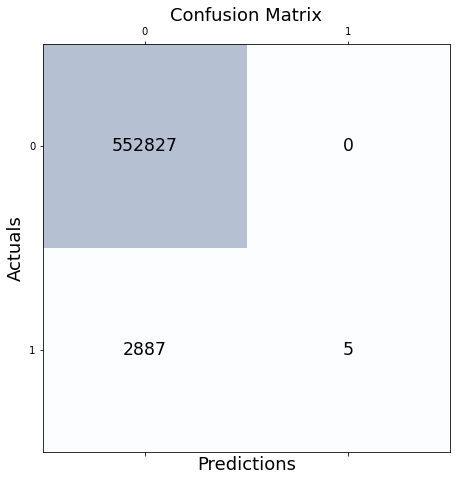

In [31]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
# Calculating the accuracy score of the model
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
accuracy

0.9948049283900676

# Model 1 - Hyperparameter Tuning of Random Forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import RandomizedSearchCV as rscv

RF_Classifier = RandomForestClassifier()

# Number of trees in random forest
parameters= {'n_estimators' : [100,1400],
              'max_features' : ['auto', 'sqrt'], # Number of features to consider at every split
              'max_depth' : [10,450], # Maximum number of levels in tree
              'min_samples_split' : [1.0,140.0], # Minimum number of samples required to split a node
              'min_samples_leaf' : [6,8], # Minimum number of samples required at each leaf node
              'criterion':['entropy','gini']}


RF_random_search = rscv(RF_Classifier,parameters,cv = 2)


RF_random_search.fit(X,y)


print(RF_random_search.best_score_)
print(RF_random_search.best_params_)


/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

0.9947899852839084
{'n_estimators': 100, 'min_samples_split': 1.0, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 450, 'criterion': 'entropy'}


In [34]:
# Fitting the model using best parameters
from sklearn.ensemble import RandomForestClassifier as rfc
rf_model = rfc(n_estimators = 100,
                          min_samples_split =  1.0,
                          min_samples_leaf = 8,
                          max_features = 'auto', 
                          max_depth = 450,
                          criterion = 'entropy')
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [35]:
# Classification Report for Random Forest with best parameters
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, rf_pred))

Test performance
-------------------------------------------------------


/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    552827
         1.0       0.00      0.00      0.00      2892

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719



/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


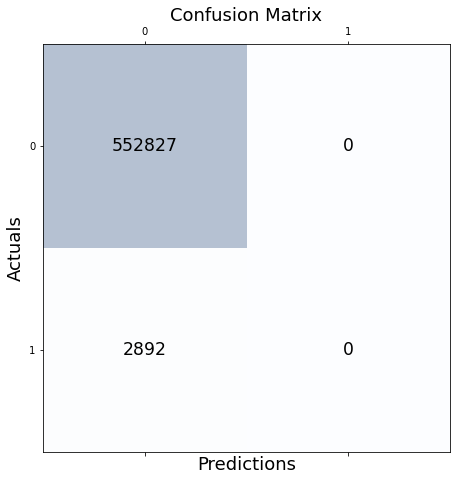

In [36]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=rf_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [37]:
#Calculation accuracy score of the model
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
accuracy

0.9948049283900676

# Model 2 - XGBoost Classifier Base Model

In [38]:
from xgboost import XGBClassifier
# fit model no training data
xgb_classifier = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, nthread=1)


start_cpu_time_xgb = time.time()
xgb_classifier.fit(X_train, y_train)
# XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, nthread=1).fit(X_train, y_train)

end_cpu_time_xgb = time.time() - start_cpu_time_xgb

In [39]:
print(end_cpu_time_xgb)

99.72720646858215


In [40]:
#Calculating predictions for XGBoost model
y_pred_xgb = xgb_classifier.predict(X_test)


In [41]:
# Calculaing Classification report for XGBoost model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred_xgb))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    552827
         1.0       0.92      0.62      0.74      2892

    accuracy                           1.00    555719
   macro avg       0.96      0.81      0.87    555719
weighted avg       1.00      1.00      1.00    555719



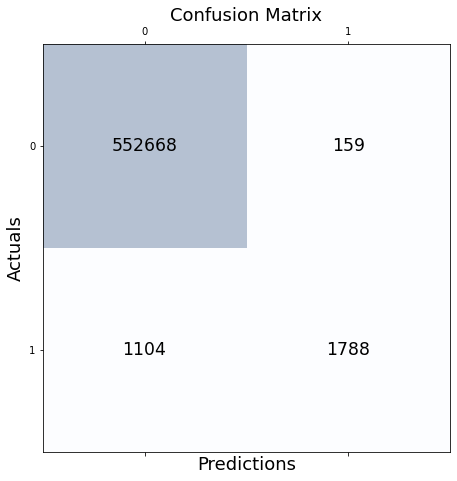

In [42]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_xgb)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [43]:
#Calculating accuracy score for XGBoost Model 
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred_xgb)
accuracy

0.9977272686375668

# Model 2 - Hyperparameter Training for XGBoost Classifier

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV as rscv

XGB_Classifier = XGBClassifier()

parameters = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}


XGB_random_search = rscv(XGB_Classifier,parameters,cv = 2)


XGB_random_search.fit(X,y)


print(XGB_random_search.best_score_)
print(XGB_random_search.best_params_)


/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/patil.ron/.local/lib/python3.8/site-packages/xgboost/sklearn.py", line 728, in fit
    self._Booster = train(xgb_options, train_dmatrix, self.get_num_boosting_rounds(),
  File "/home/patil.ron/.local/lib/python3.8/site-packages/xgboost/training.py", line 212, in train
    return _t

0.9947899852839084
{'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1, 'booster': 'gblinear', 'base_score': 0.5}


In [45]:
# Fitting the model with best paameters
from xgboost import XGBClassifier
xgb_model = XGBClassifier(reg_lambda = 1,
                          reg_alpha = 1,
                          n_estimators = 100,
                          learning_rate = 0.05, 
                          gamma = 1,
                          booster = 'gblinear',
                          base_score = 0.5)
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)

In [46]:
#Calculating Classification report for XGBoost Model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, xgb_pred))

Test performance
-------------------------------------------------------


/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    552827
         1.0       0.00      0.00      0.00      2892

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719



/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/patil.ron/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


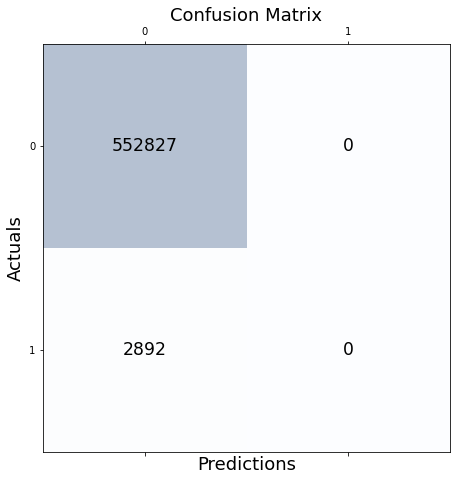

In [47]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=xgb_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [48]:
#Calculating accuracy score for XGBoost Model with best parameters
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, xgb_pred)
accuracy

0.9947959310370889

# Model 3 - LightGBM Classifier Base Model

In [49]:
import lightgbm as lgb 

In [50]:
# Fitting the model with Light LGBM Classifier 
lgbm_classifier = lgb.LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, n_jobs =1)
start_cpu_time_lgb = time.time()

lgbm_classifier.fit(X_train, y_train)

end_cpu_time_lgb = time.time() - start_cpu_time_lgb

In [51]:
print(end_cpu_time_lgb)

12.153056621551514


In [52]:
#Predicting values for the lgbm Classifier
y_pred_lgb = lgbm_classifier.predict(X_test)

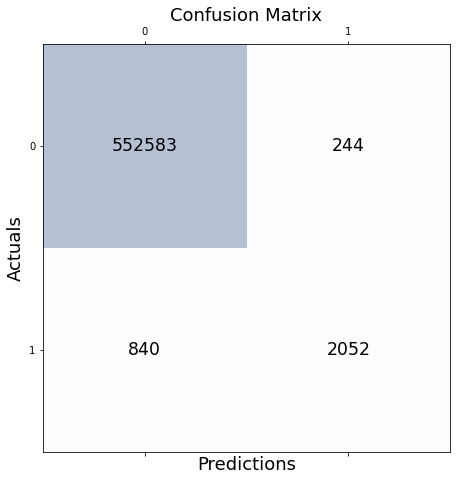

In [53]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_lgb)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [54]:
# Calculating accuracy for the LGBM base model
accuracy = metrics.accuracy_score(y_test, y_pred_lgb)
accuracy

0.9980493738742062

# Model 3 - Hyperparameter Tuning for LightGBM Model

In [55]:
# Fitting the model with the best parameters
import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV as rscv

LGBM_Classifier = lgb.LGBMClassifier()

parameters = {
    'num_leaves':[20,40,60,80,100],
    'min_child_samples':[5,10,15],
    'max_depth':[-1,5,10,20],
    'learning_rate':[0.05,0.1,0.2],
    'reg_alpha':[0,0.01,0.03]
}


LGBM_random_search = rscv(LGBM_Classifier,parameters,cv = 2)


LGBM_random_search.fit(X,y)


print(LGBM_random_search.best_score_)
print(LGBM_random_search.best_params_)


0.6740202138421956
{'reg_alpha': 0.01, 'num_leaves': 80, 'min_child_samples': 15, 'max_depth': 10, 'learning_rate': 0.2}


In [56]:
import lightgbm as lgb
# LGBMClassifier = lgb.LGBMClassifier()
lgbm_model = lgb.LGBMClassifier(
                          reg_alpha = 0.01,
                          num_leaves = 80,
                          min_child_samples = 15,
                          learning_rate = 0.2, 
                          max_depth = 10)
lgbm_model.fit(X_train,y_train)
lgbm_pred = lgbm_model.predict(X_test)

In [57]:
# Calculating the classification report for the hyperparameter tuned modek for LGBM
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, lgbm_pred))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    552827
         1.0       0.09      0.25      0.14      2892

    accuracy                           0.98    555719
   macro avg       0.55      0.62      0.56    555719
weighted avg       0.99      0.98      0.99    555719



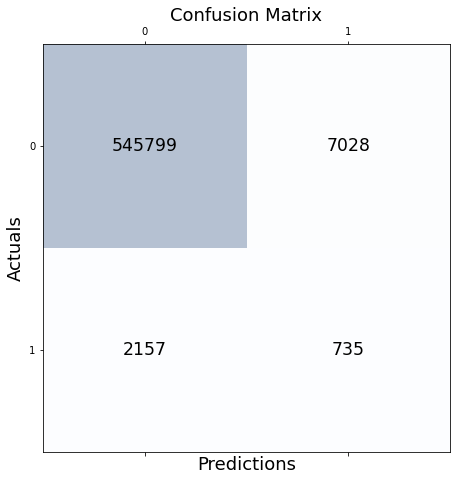

In [58]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=lgbm_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [59]:
#Calculating accuracy for the model with best paameters
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, lgbm_pred)
accuracy

0.9834718625780295

# Parallel Computing using Dask 

In [60]:
#Importing dask library for launching dask scheduler
from dask.distributed import Client
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:45940 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [61]:
#reading the file using dask
import dask.dataframe as dd
%time dask_data_dd = dd.from_pandas(features, npartitions=4)

CPU times: user 417 ms, sys: 41.1 ms, total: 458 ms
Wall time: 442 ms


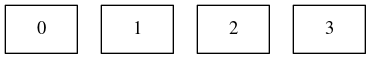

In [62]:
dask_data_dd.visualize()

In [63]:
# ! pip install dask_ml

# Creating dask array for available data
import dask
import dask.array as da
from dask_ml.datasets import make_classification


n, d = 1852394, 15

X, y = make_classification(n_samples=n, n_features=d,
                           chunks=n // 10, flip_y=0.2)
X

dask.array<normal, shape=(1852394, 15), dtype=float64, chunksize=(185239, 15), chunktype=numpy.ndarray>

In [64]:
#Splitting the entire data using dask Machine learning package's train-test split library

from dask_ml.model_selection import train_test_split
X = dask_data_dd[['amount(usd)', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'category','age', 'hour','day', 'month', 'year', 'gender']].to_dask_array(lengths=True)

y = dask_data_dd['is_fraud'].to_dask_array(lengths=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

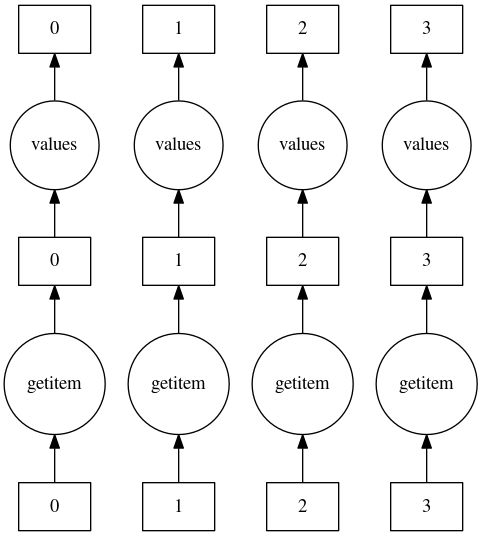

In [65]:
# !pip install graphviz
y.visualize()

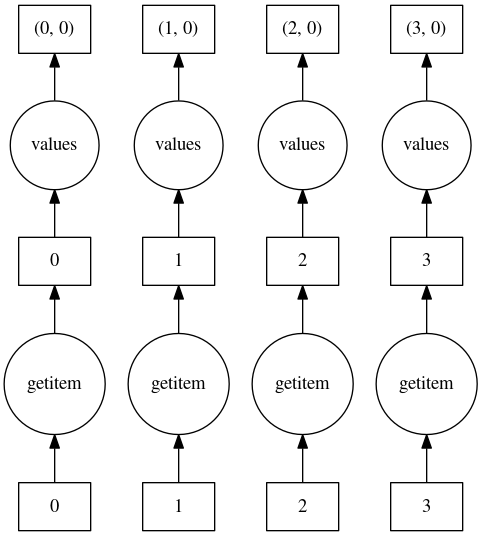

In [66]:
X.visualize()

# Model 4: XGBoost Classifier on Dask_ML

In [67]:
#XGBClassifier
from dask_ml.xgboost import XGBClassifier
elapsed = []
cpus = [1, 2, 4, 8]#Calculating trend curve

xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, nthread=4)
def plot_elapsed(cpus_nums):
    for i in cpus_nums:
        start = time.perf_counter()
        xgb.fit(X_train, y_train)
        end = time.perf_counter()-start
        elapsed.append(time.perf_counter()-start)
        print("\nTotal Time by CPU",i,":",end)
    plt.plot(cpus, elapsed)
    plt.title('Elapsed vs CPUs')
    plt.xlabel('CPUs')
    plt.ylabel('Time in sec')
    plt.savefig('elapsed_cpus_xgboost.png')
    plt.show(block=True)


#### Plotting elapsed time for the XGBoost model


Total Time by CPU 1 : 91.97494061291218

Total Time by CPU 2 : 79.21823432482779

Total Time by CPU 4 : 78.7261646669358

Total Time by CPU 8 : 78.48326447047293


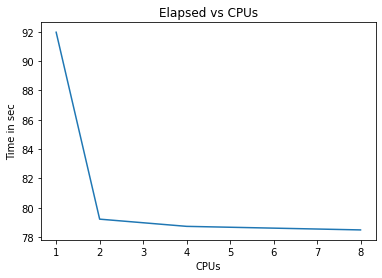

In [68]:
plot_elapsed(cpus)

In [69]:
# Predicting is_fraud using parallel computing model for XGBoost
y_predicted_xgb = xgb.predict(X_test)

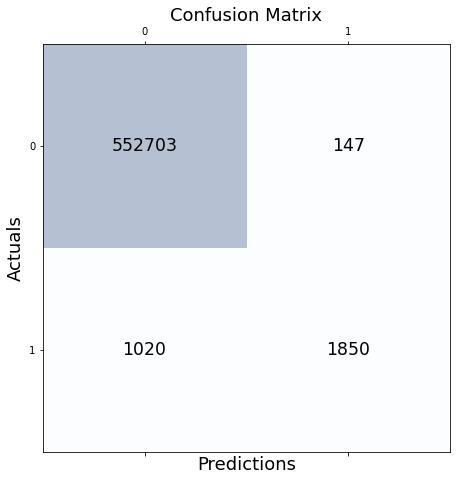

In [70]:
# Get the predictions

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted_xgb)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [71]:
# Calculating the accuracy score for the dask_ml XGBoost model
xgb.score(X_train, y_train)

0.9978414003828256

# Model 5: Random Forest Classifier using Dask_ML

In [72]:
#RandomForestClassifier
import joblib
from sklearn.ensemble import RandomForestClassifier
from joblib import parallel_backend
elapsed = []
cpus = [1, 2, 4, 8]#Calculating trend curve

rf = RandomForestClassifier(n_estimators = 100, max_depth = 3, n_jobs = 4)
def plot_elapsed(cpus_nums):
    for i in cpus_nums:
        start = time.perf_counter()
        with parallel_backend('dask'):
            rf.fit(X_train, y_train)
        end = time.perf_counter()-start
        elapsed.append(time.perf_counter()-start)
        print("\nTotal Time by CPU",i,":",end)
    plt.plot(cpus, elapsed)
    plt.title('Elapsed vs CPUs')
    plt.xlabel('CPUs')
    plt.ylabel('Time in sec')
    plt.savefig('elapsed_cpus_randomforest.png')
    plt.show(block=True)


# Plotting elapsed time for the Random Forest Classifier model using Scikit learn library & Joblib for parallel computing


Total Time by CPU 1 : 44.925891479477286

Total Time by CPU 2 : 37.07088512554765

Total Time by CPU 4 : 35.98139578104019

Total Time by CPU 8 : 36.576894188299775


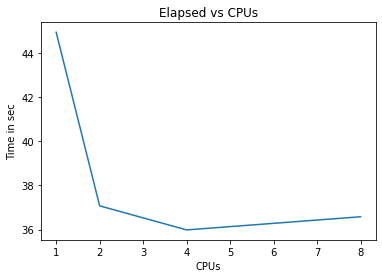

In [73]:
plot_elapsed(cpus)

In [74]:
# Predicting the is_fraud values using parallel computing processing model for Random Forest Classifer
y_predicted_rf = rf.predict(X_test)

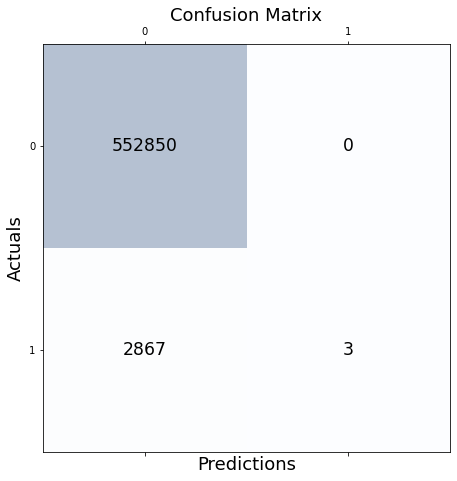

In [75]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted_rf)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [76]:
# Calculating accuracy score for Random forest classifier after processing parallelly on multiple CPUs
rf.score(X_train, y_train)

0.9947812634478674

# Model 6: Light Gradient Descent Classifer

In [77]:
#LightGBM
import lightgbm as lgb
elapsed = []
cpus = [1, 2, 4, 8]#Calculating trend curve

lgb = lgb.LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, n_jobs =4)
def plot_elapsed(cpus_nums):
    for i in cpus_nums:
        start = time.perf_counter()
        lgb.fit(X_train, y_train)
        end = time.perf_counter()-start
        elapsed.append(time.perf_counter()-start)
        print("\nTotal Time by CPU",i,":",end)
    plt.plot(cpus, elapsed)
    plt.title('Elapsed vs CPUs')
    plt.xlabel('CPUs')
    plt.ylabel('Time in sec')
    plt.savefig('elapsed_cpus_xgboost.png')
    plt.show(block=True)


Total Time by CPU 1 : 13.006828246638179

Total Time by CPU 2 : 13.584936497732997

Total Time by CPU 4 : 13.47572198882699

Total Time by CPU 8 : 13.633190581575036


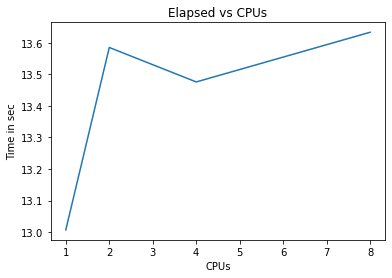

In [78]:
# Calculating total elapsed time for LGBM classifier after processing parallelly on multiple CPUs
plot_elapsed(cpus)

In [79]:
# Calculating predictions for is_fraud using LGBM classifier after processing parallelly on multiple CPUs
y_predicted_lgb = lgb.predict(X_test)

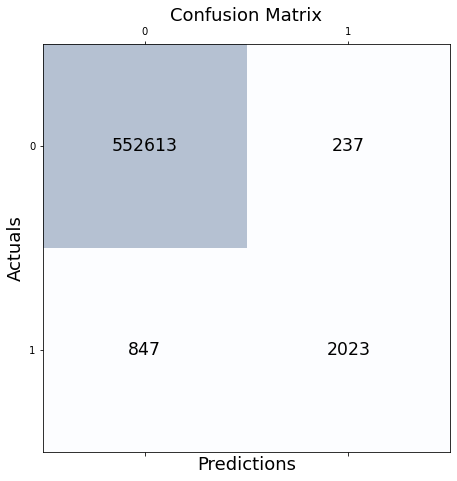

In [80]:
# Get the predictions

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted_lgb)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [81]:
# Calculating accuracy score for LGBM classifier after processing parallelly on multiple CPUs
lgb.score(X_train, y_train)

0.9980650495035761